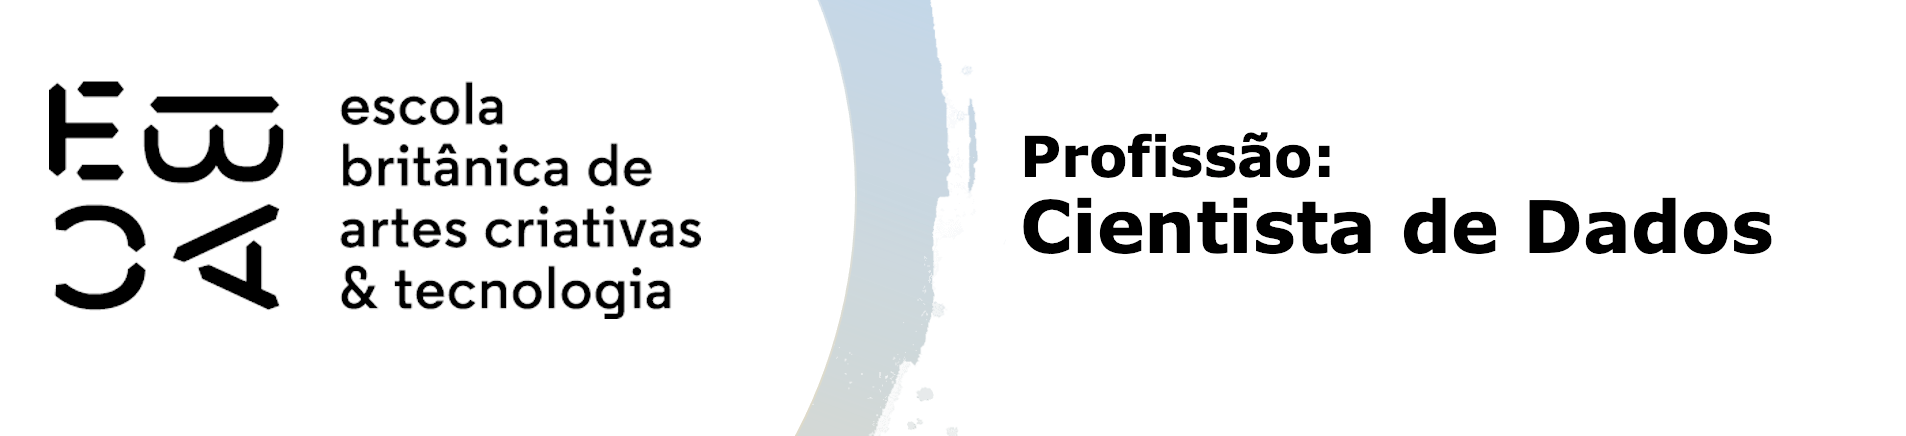

# Métodos hierárquicos de agrupamento - Tarefa

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [46]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

In [47]:
padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [48]:
clus = AgglomerativeClustering(linkage="complete", 
                               distance_threshold = None, 
                               n_clusters=3)

In [49]:
clus.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

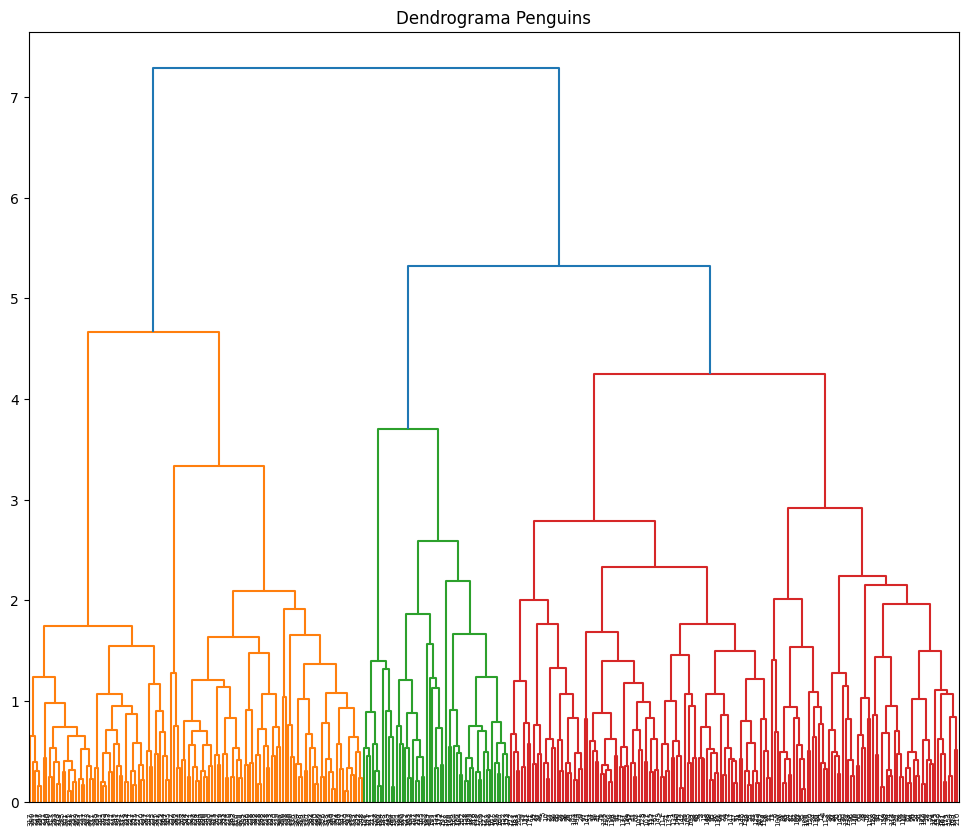

In [50]:
plt.figure(figsize=(12, 10))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))
plt.title('Dendrograma Penguins');

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [51]:
peng_num['grupo'] = clus.labels_

In [52]:
peng = peng.merge(peng_num['grupo'], how='left', on='id')

#### Número de espécies de pinguins em cada grupo:

In [54]:
pd.crosstab(peng['species'], peng['grupo'])

grupo,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


É possível concluir que o grupo 0 agrupou muito bem a espécie Gentoo, o grupo 1 agrupou relativamente bem a espécie Adelie e o grupo 2 agrupou de forma satisfatória a espécie Chinstrap.

#### Análise descritiva das variáveis quantitativas:

##### Comparação das médias das variáveis quantitativas entre os grupos e as espécies de pinguins:

In [ ]:
var_num = peng.select_dtypes(include='number').drop(columns='grupo').columns.to_list()

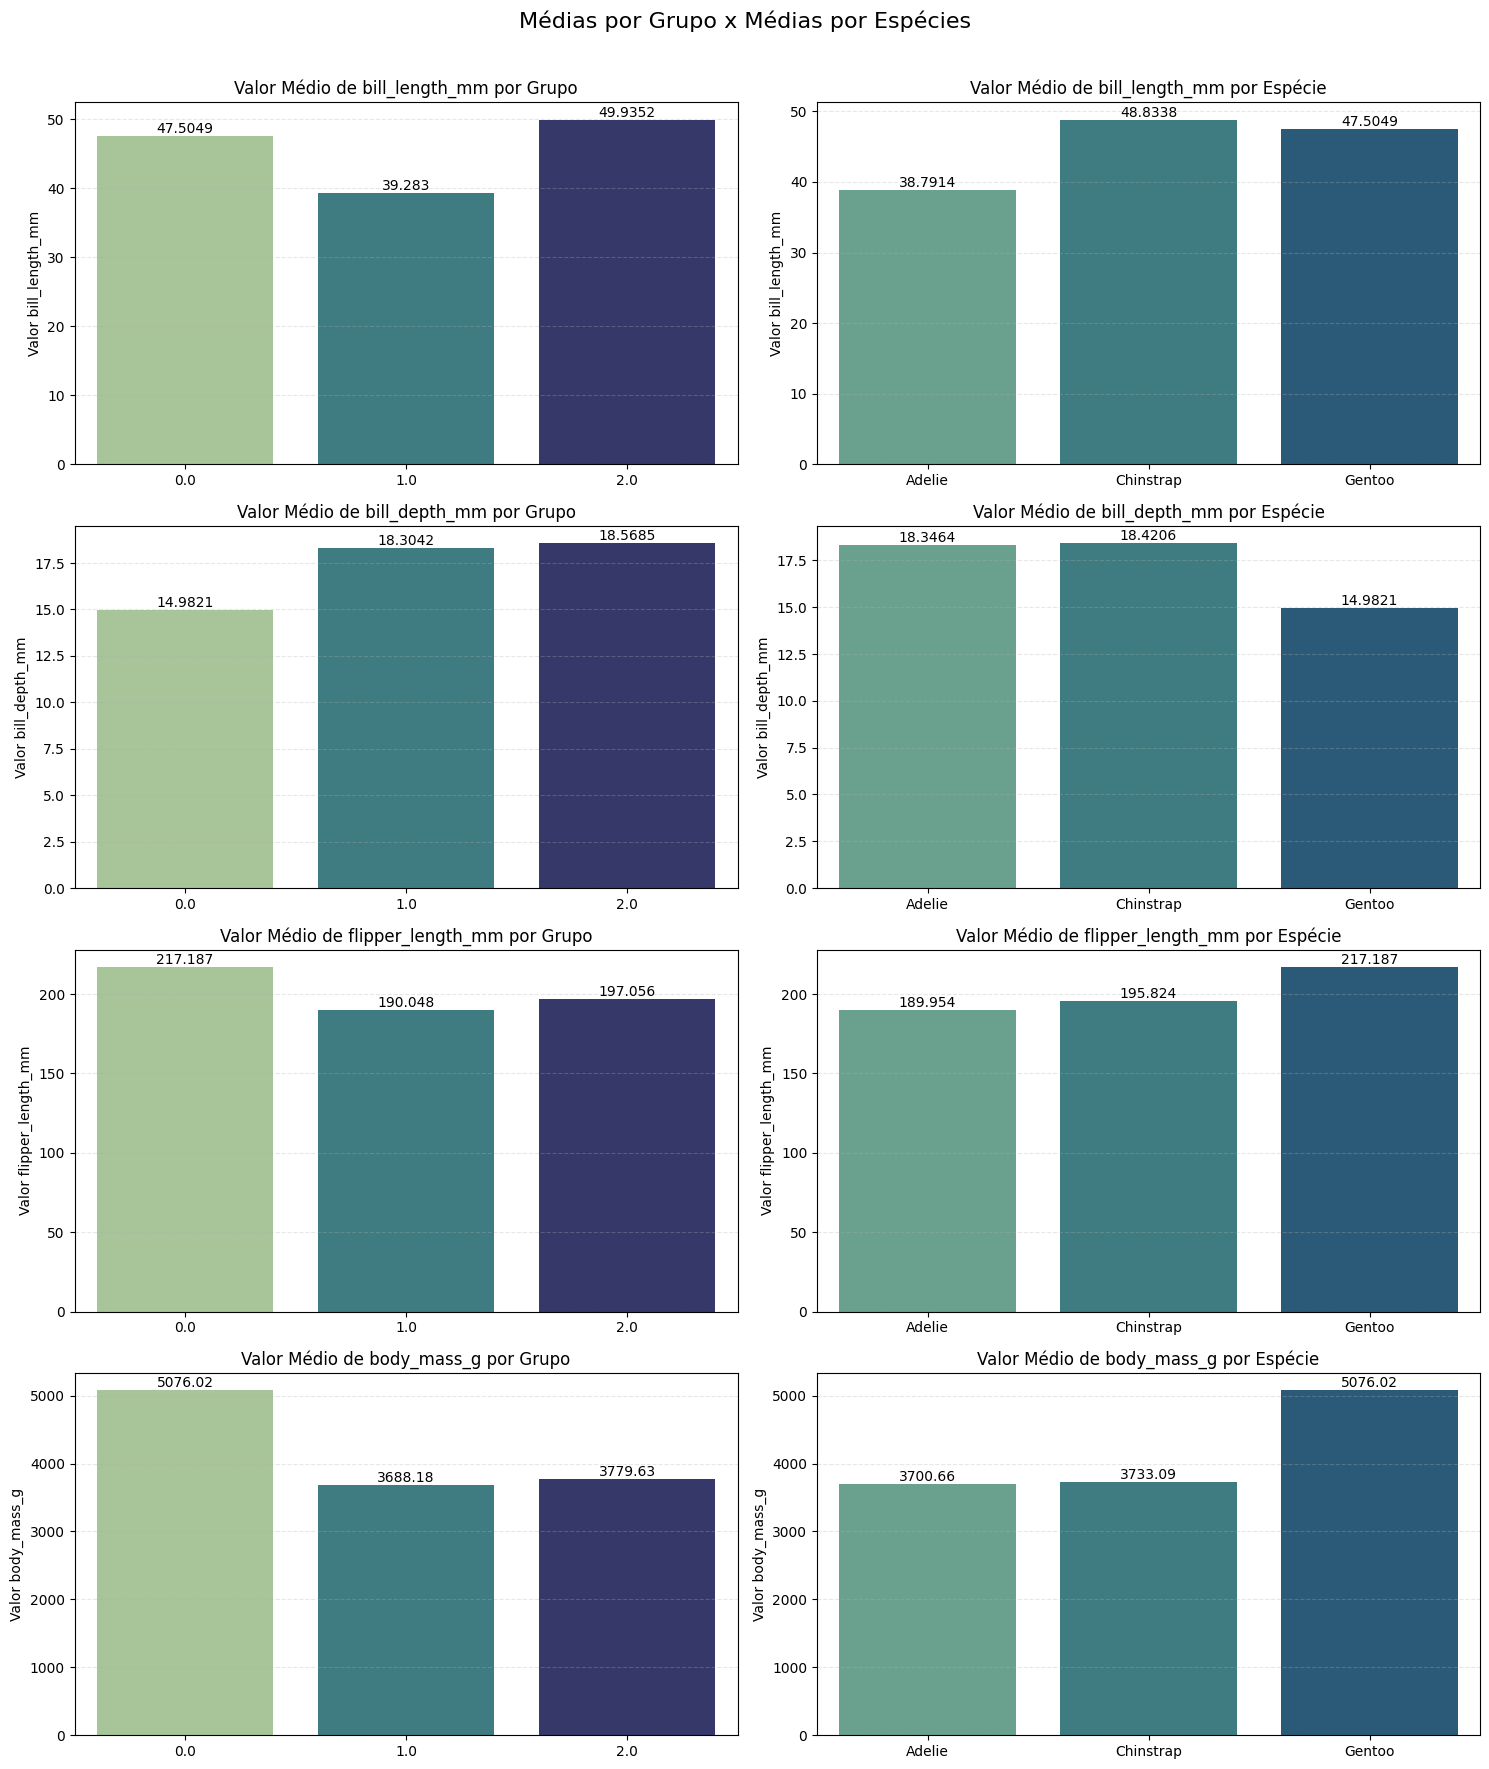

In [151]:
fig, axes = plt.subplots(nrows=len(var_num), ncols=2, figsize=(15,18))
fig.suptitle('Médias por Grupo x Médias por Espécies', fontsize=16)

for idx, var in enumerate(var_num):
    
    # Médias por grupo
    grb1 = peng.groupby('grupo')[var].mean().reset_index(name='media')
    sns.barplot(data=grb1,
                x='grupo',
                y='media',
                ax=axes[idx, 0],
                hue='grupo',   
                legend=False,  
                palette='crest')
    
    axes[idx, 0].set_title(f'Valor Médio de {var} por Grupo')
    axes[idx, 0].set_ylabel(f'Valor {var}')
    axes[idx, 0].set_xlabel('')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.3)
    
    for container in axes[idx, 0].containers:
        axes[idx, 0].bar_label(container, fontsize=10)

    # Médias por espécie
    grb2 = peng.groupby('species')[var].mean().reset_index(name='media')
    sns.barplot(data=grb2,
                x='species',
                y='media',
                ax=axes[idx, 1],
                hue='species',
                legend=False,
                palette='crest')
    
    axes[idx, 1].set_title(f'Valor Médio de {var} por Espécie')
    axes[idx, 1].set_ylabel(f'Valor {var}')
    axes[idx, 1].set_xlabel('')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.3)
    
    for container in axes[idx, 1].containers:
        axes[idx, 1].bar_label(container, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Comparação das distribuições das variáveis quantitativas entre os grupos e as espécies de pinguins:

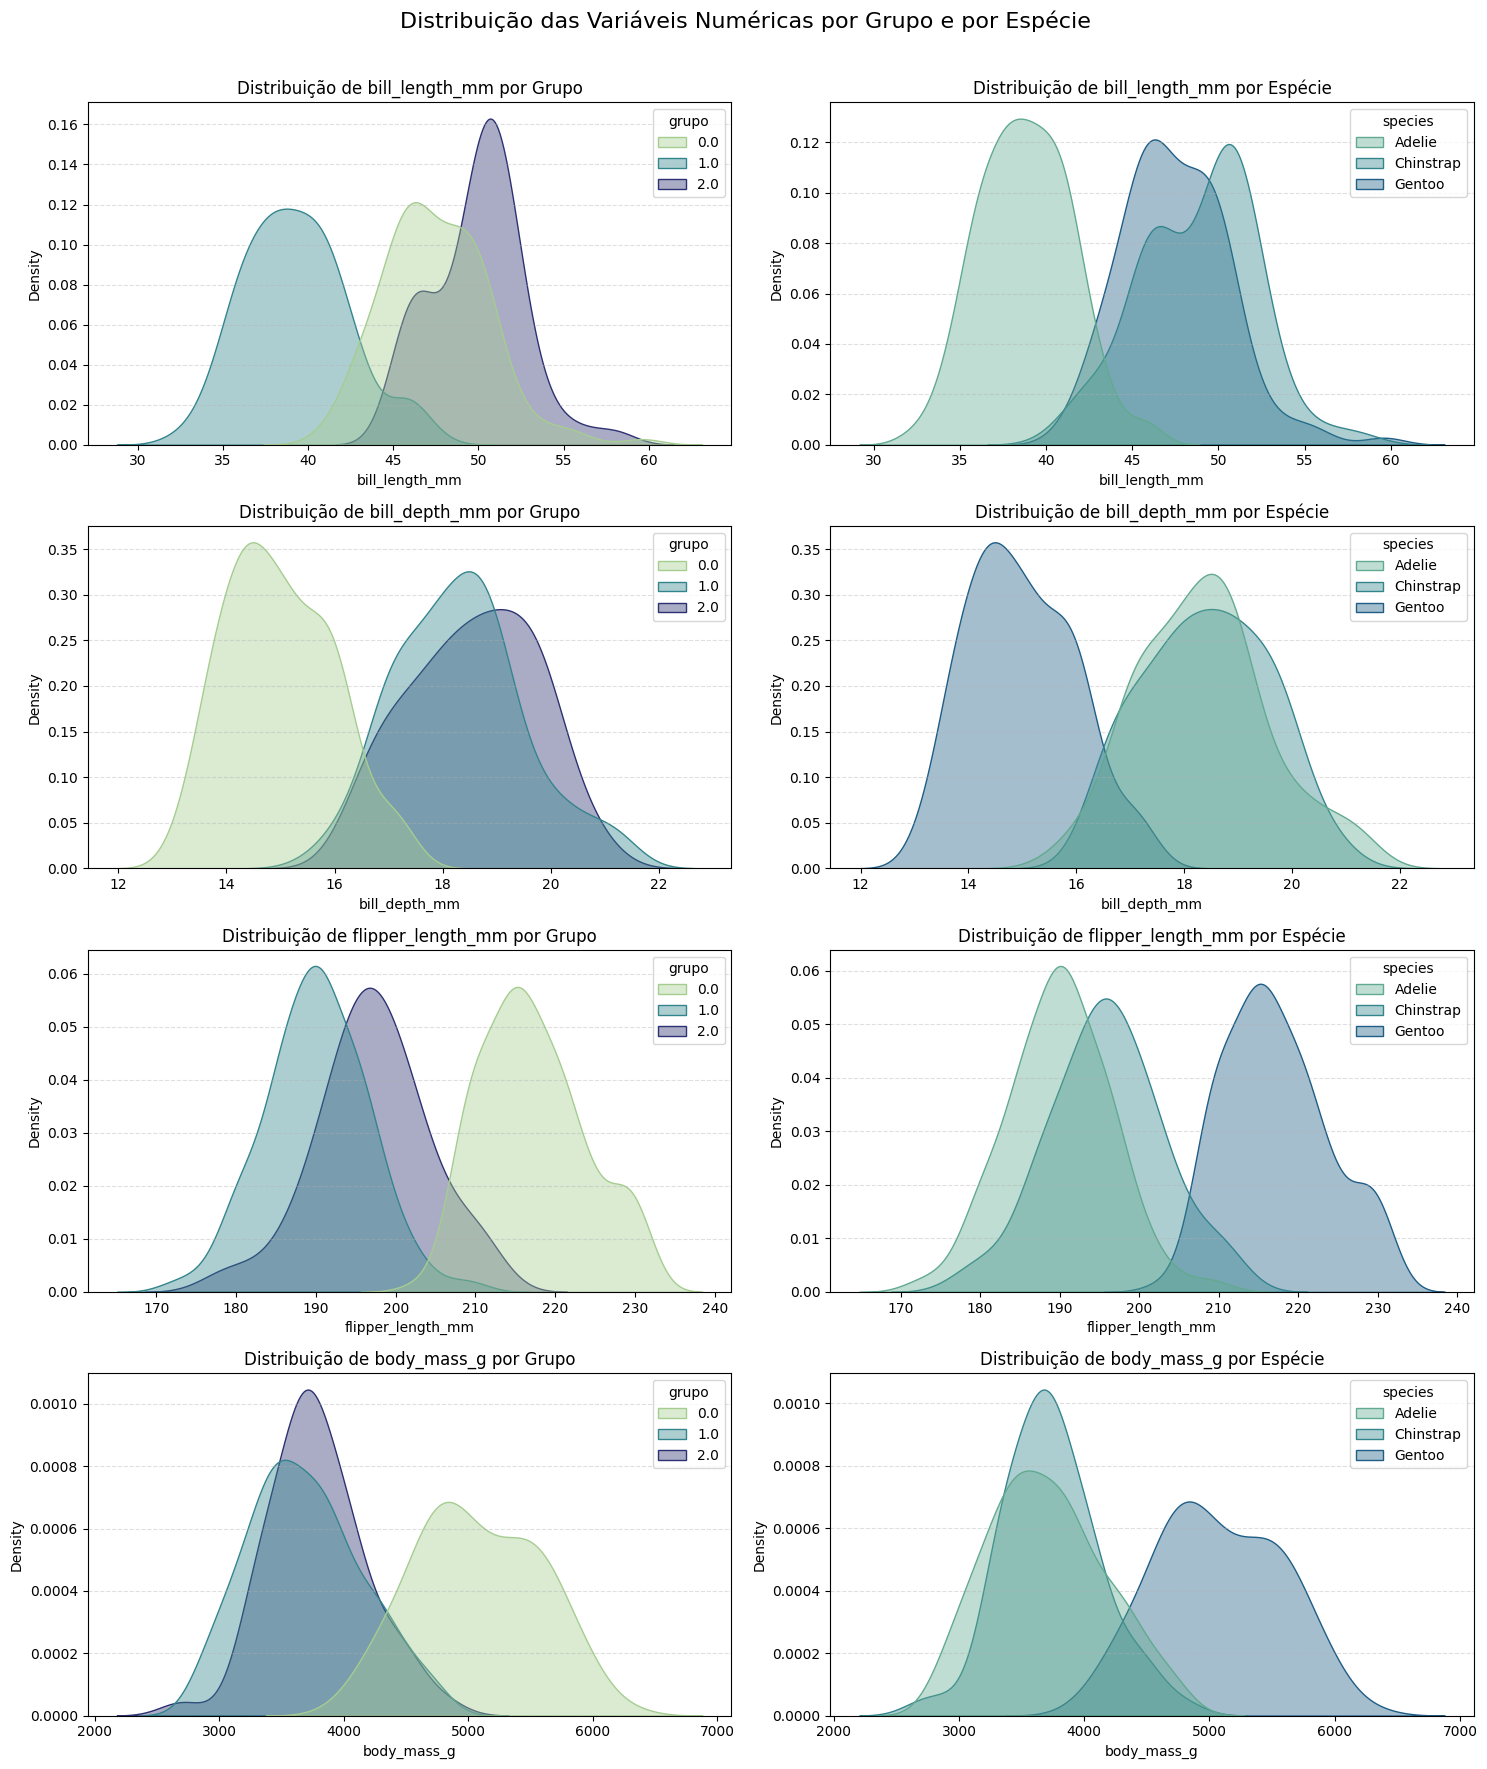

In [152]:
fig, axes = plt.subplots(nrows=len(var_num), ncols=2, figsize=(15,18))
fig.suptitle('Distribuição das Variáveis Numéricas por Grupo e por Espécie', fontsize=16)

for idx, var in enumerate(var_num):
    # Distribuição por grupo
    sns.kdeplot(data=peng,
                x=var,
                hue='grupo',
                fill=True,
                common_norm=False,
                alpha=0.4,
                palette='crest',
                ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribuição de {var} por Grupo')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.4)

    # Distribuição por espécie
    sns.kdeplot(data=peng,
                x=var,
                hue='species',
                fill=True,
                common_norm=False,
                alpha=0.4,
                palette='crest',
                ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Distribuição de {var} por Espécie')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Paiplot dos grupos criados:

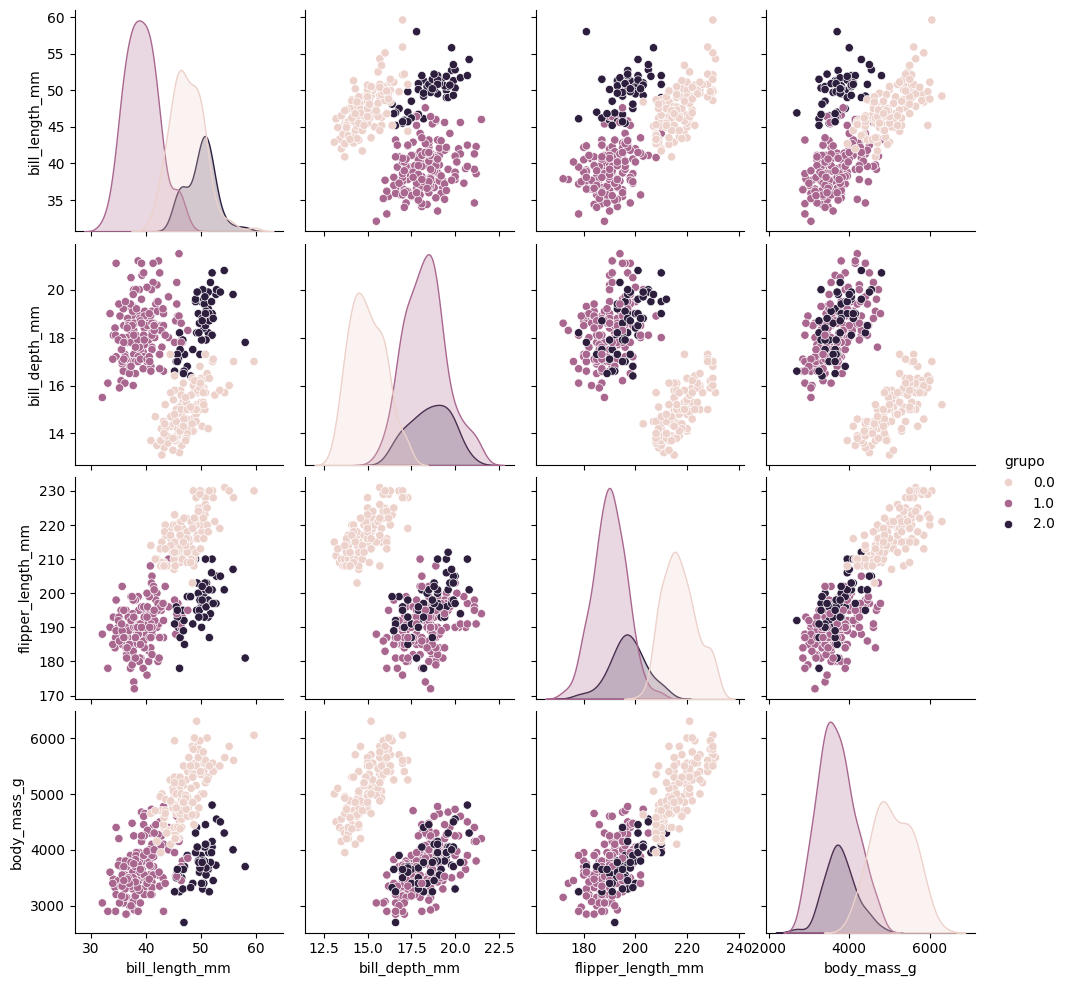

In [157]:
sns.pairplot(data=peng, hue='grupo')

##### Pairplot das espécies de pinguins:

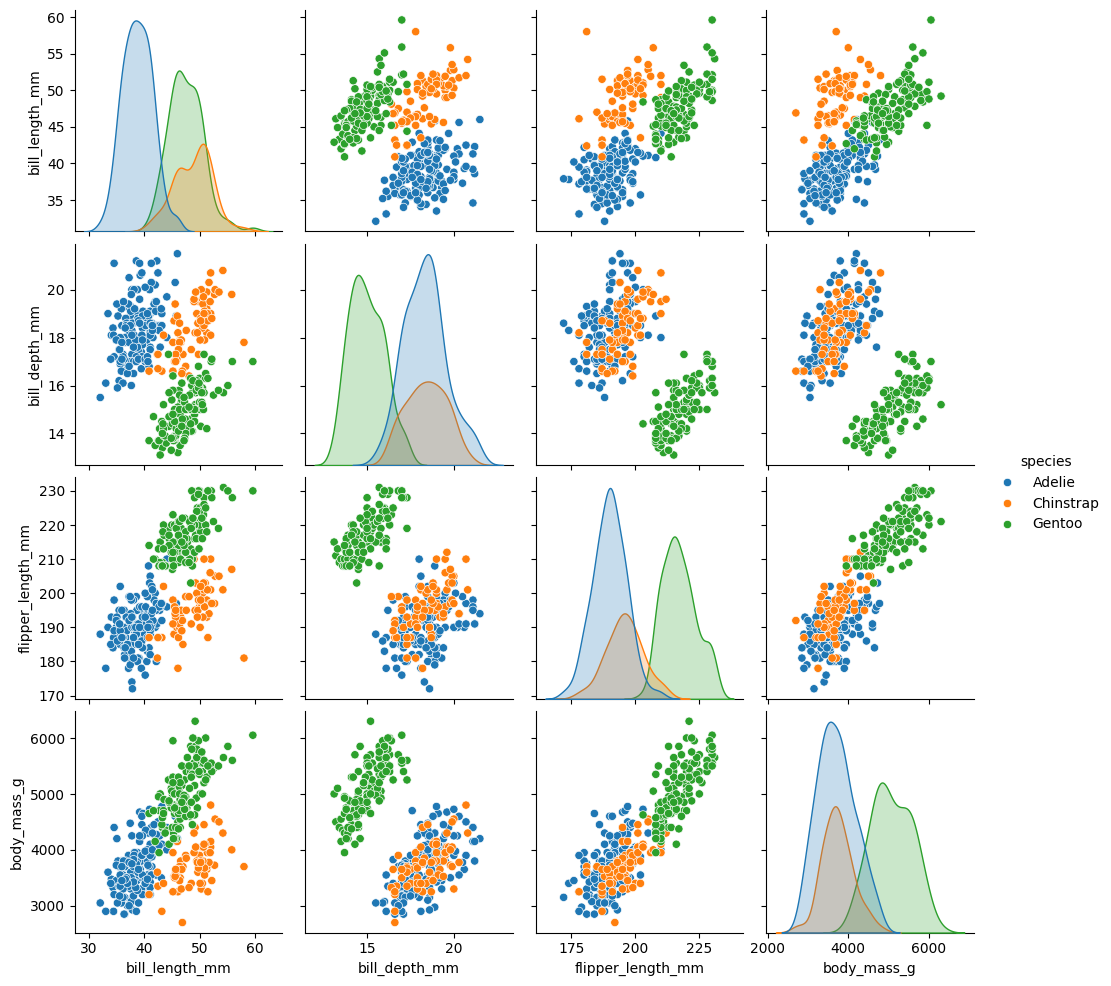

In [156]:
sns.pairplot(data=peng.drop(columns='grupo'), hue='species')

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

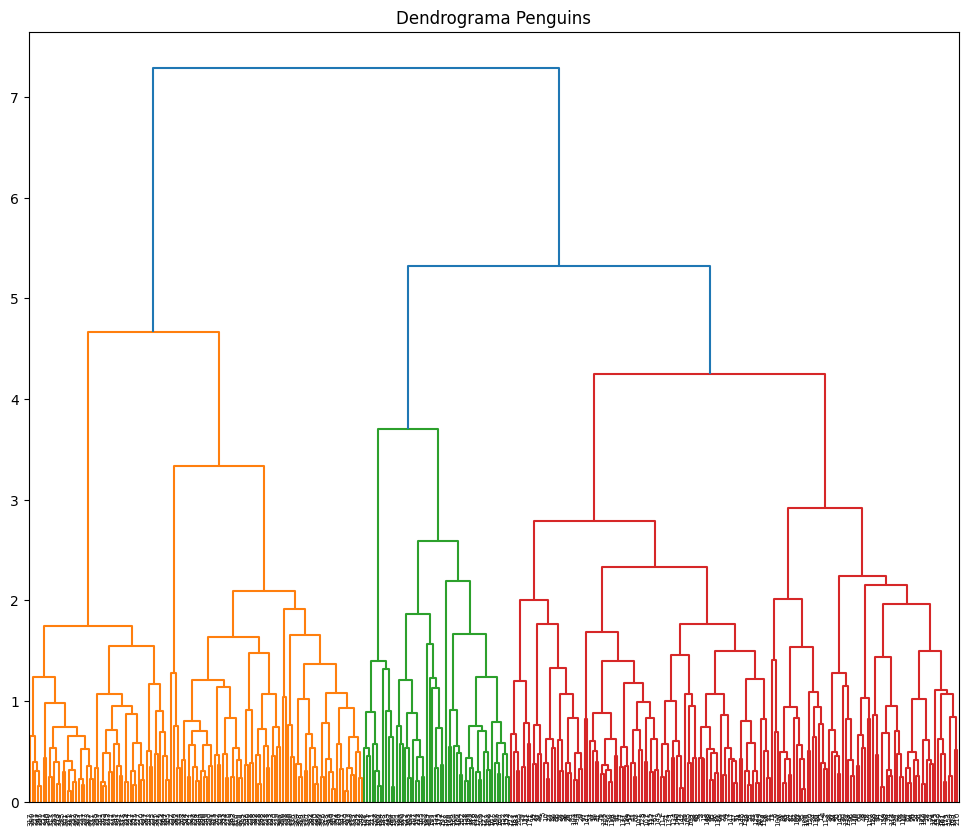

In [158]:
plt.figure(figsize=(12, 10))
dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))
plt.title('Dendrograma Penguins');

O dendrorama sugere 6 clusters como opção também. 

In [159]:
clus_six = AgglomerativeClustering(linkage="complete", 
                               distance_threshold = None, 
                               n_clusters=6)

In [160]:
clus_six.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [176]:
peng_six = peng.drop(columns='grupo').copy()
peng_num_six = peng_num.drop(columns='grupo').copy()

In [177]:
peng_num_six['grupo'] = clus_six.labels_

In [178]:
peng_six = peng_six.merge(peng_num_six['grupo'], how='left', on='id')

#### Número de espécies de pinguins em cada grupo:

In [179]:
pd.crosstab(peng_six['species'], peng_six['grupo'])

grupo,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


#### Número de espécies de pinguins machos e fêmeas em cada grupo:

In [201]:
tab = peng_six.pivot_table(index=['grupo', 'species'], columns='sex', aggfunc='size', fill_value=0)

tab

sex              Female  Male
grupo species                
0.0   Gentoo          9    61
1.0   Adelie         69    18
      Chinstrap       5     0
2.0   Adelie          4    55
      Chinstrap       9     0
3.0   Gentoo         49     0
4.0   Chinstrap      20    22
5.0   Chinstrap       0    12

##### Comparação das distribuições das variáveis quantitativas entre os grupos e as espécies de pinguins:

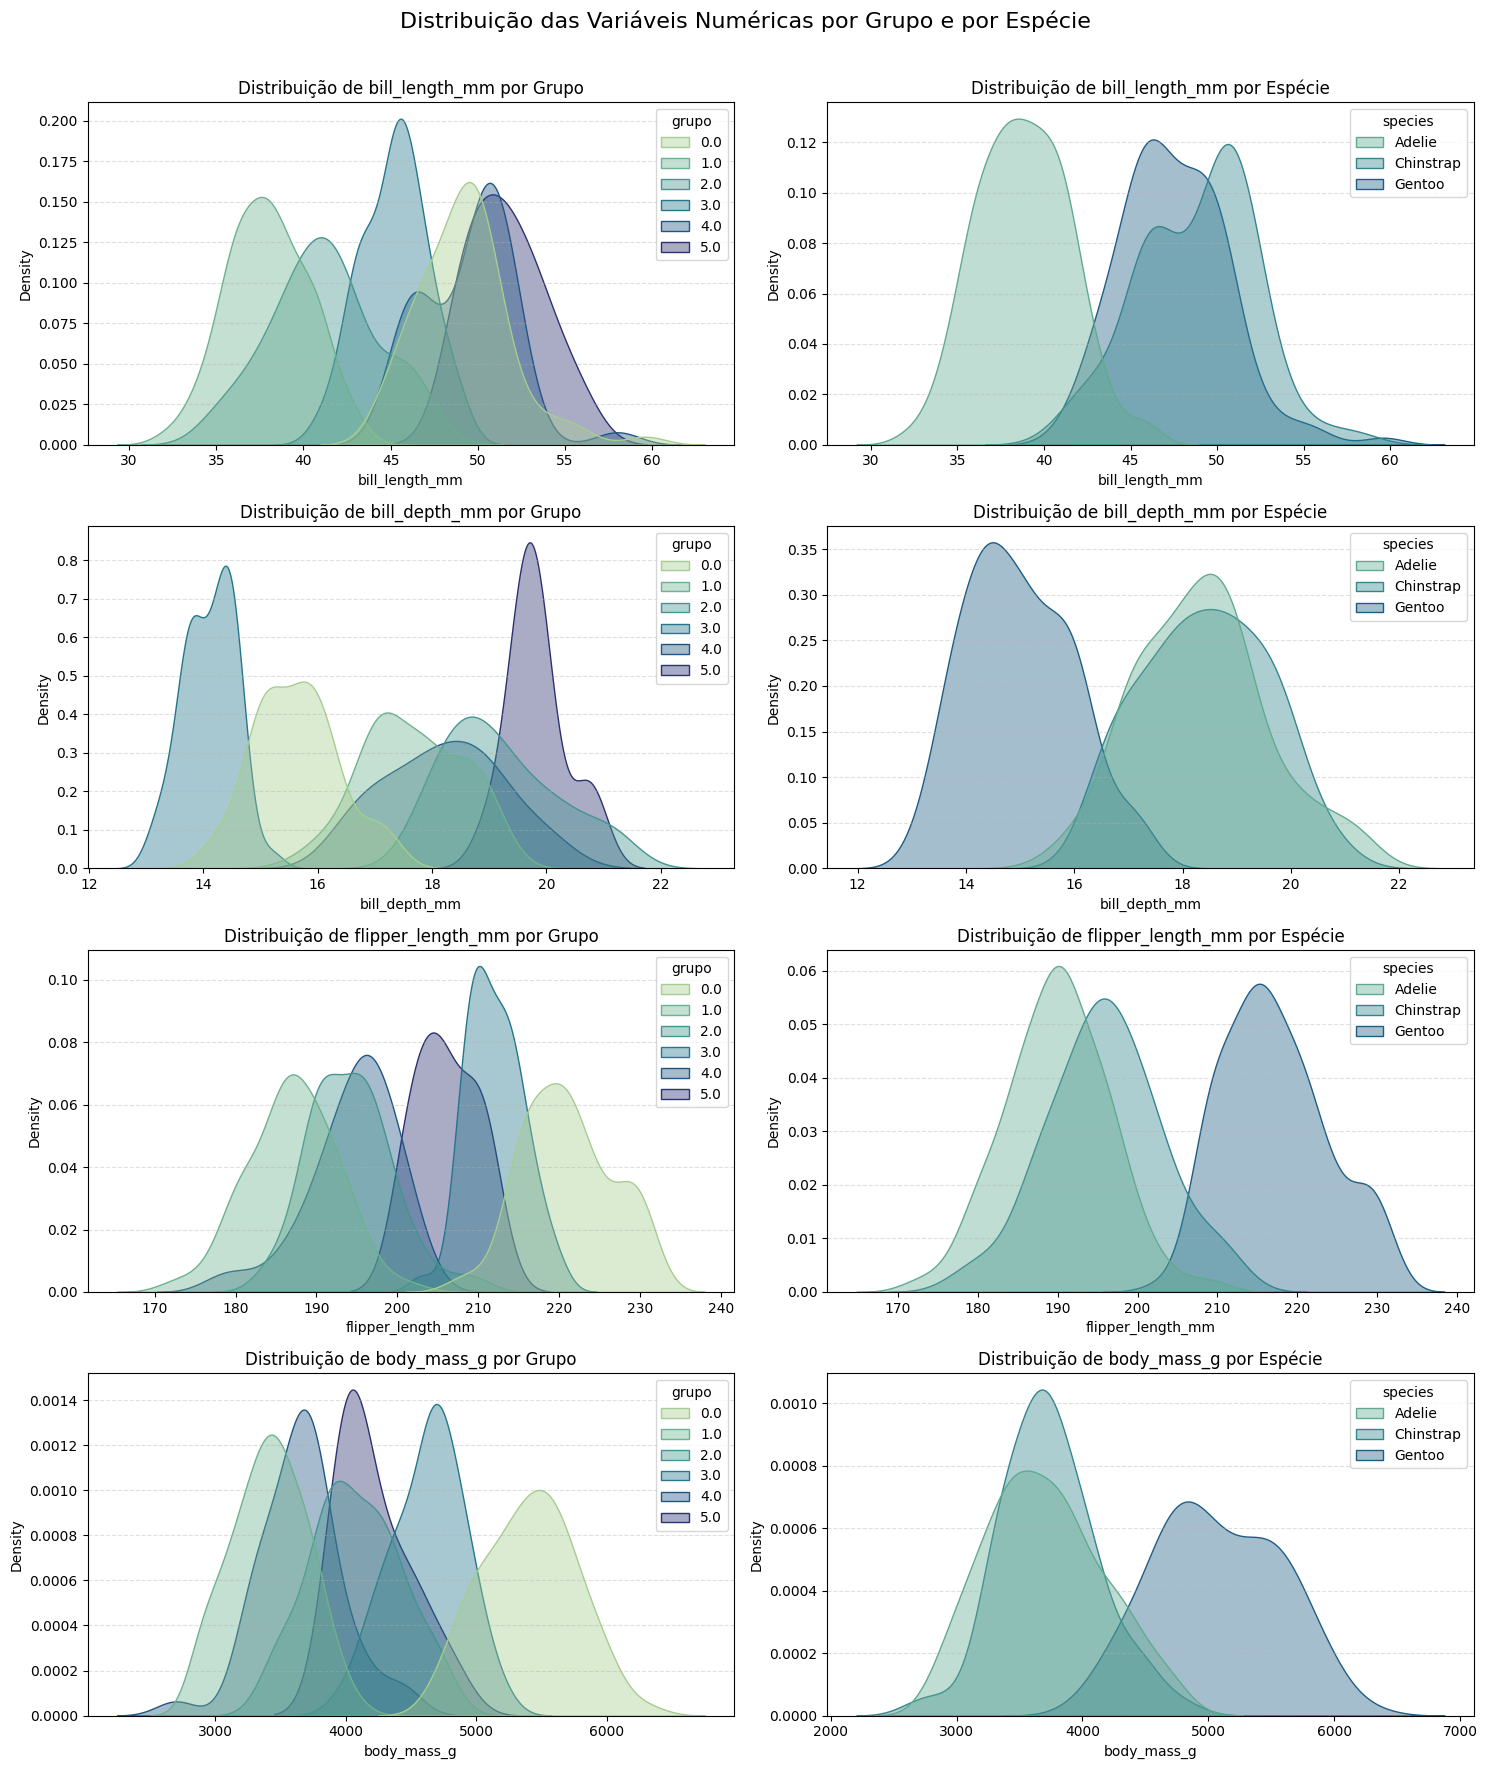

In [202]:
fig, axes = plt.subplots(nrows=len(var_num), ncols=2, figsize=(15,18))
fig.suptitle('Distribuição das Variáveis Numéricas por Grupo e por Espécie', fontsize=16)

for idx, var in enumerate(var_num):
    # Distribuição por grupo
    sns.kdeplot(data=peng_six,
                x=var,
                hue='grupo',
                fill=True,
                common_norm=False,
                alpha=0.4,
                palette='crest',
                ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribuição de {var} por Grupo')
    axes[idx, 0].grid(axis='y', linestyle='--', alpha=0.4)

    # Distribuição por espécie
    sns.kdeplot(data=peng_six,
                x=var,
                hue='species',
                fill=True,
                common_norm=False,
                alpha=0.4,
                palette='crest',
                ax=axes[idx, 1])
    axes[idx, 1].set_title(f'Distribuição de {var} por Espécie')
    axes[idx, 1].grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

##### Pairplot dos grupos criados:

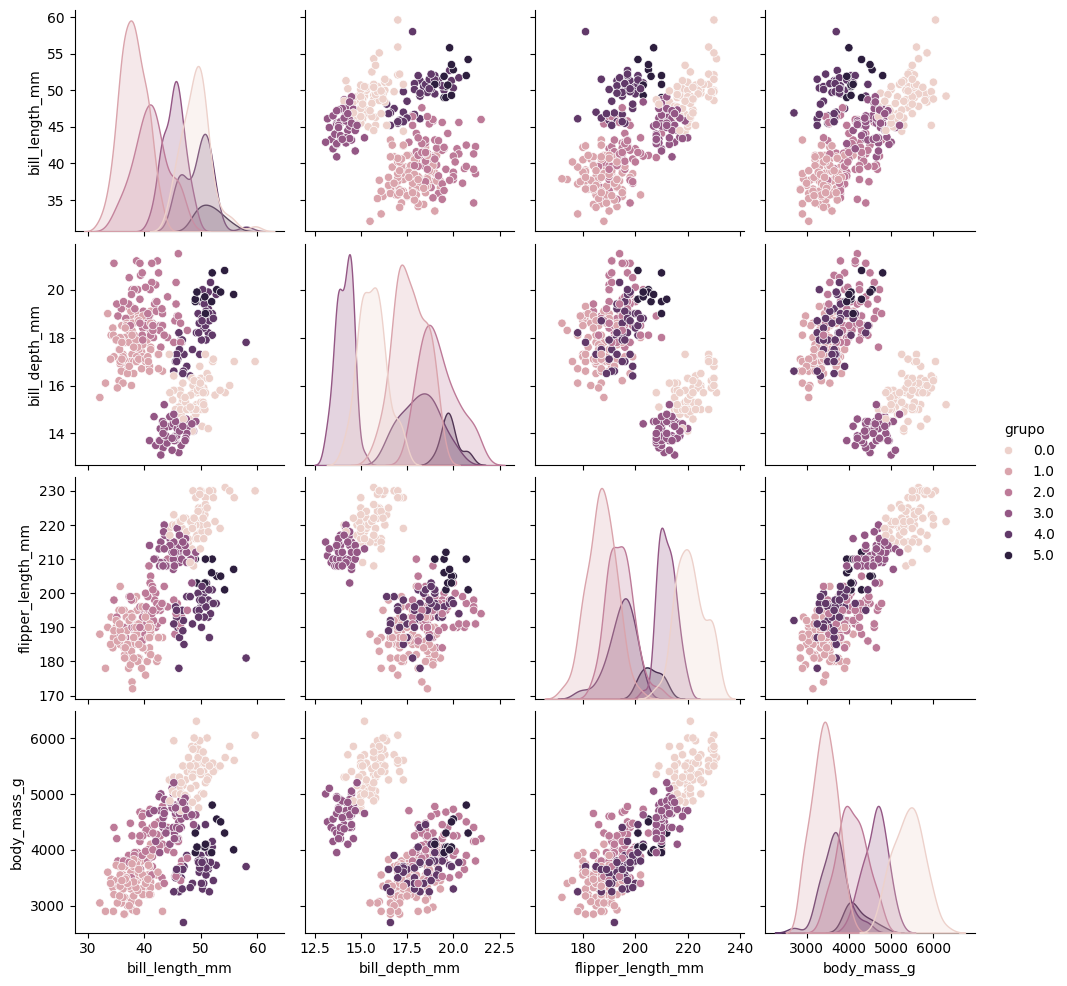

In [204]:
sns.pairplot(peng_six, hue='grupo');

##### Pairplot das epécies de pinguins:

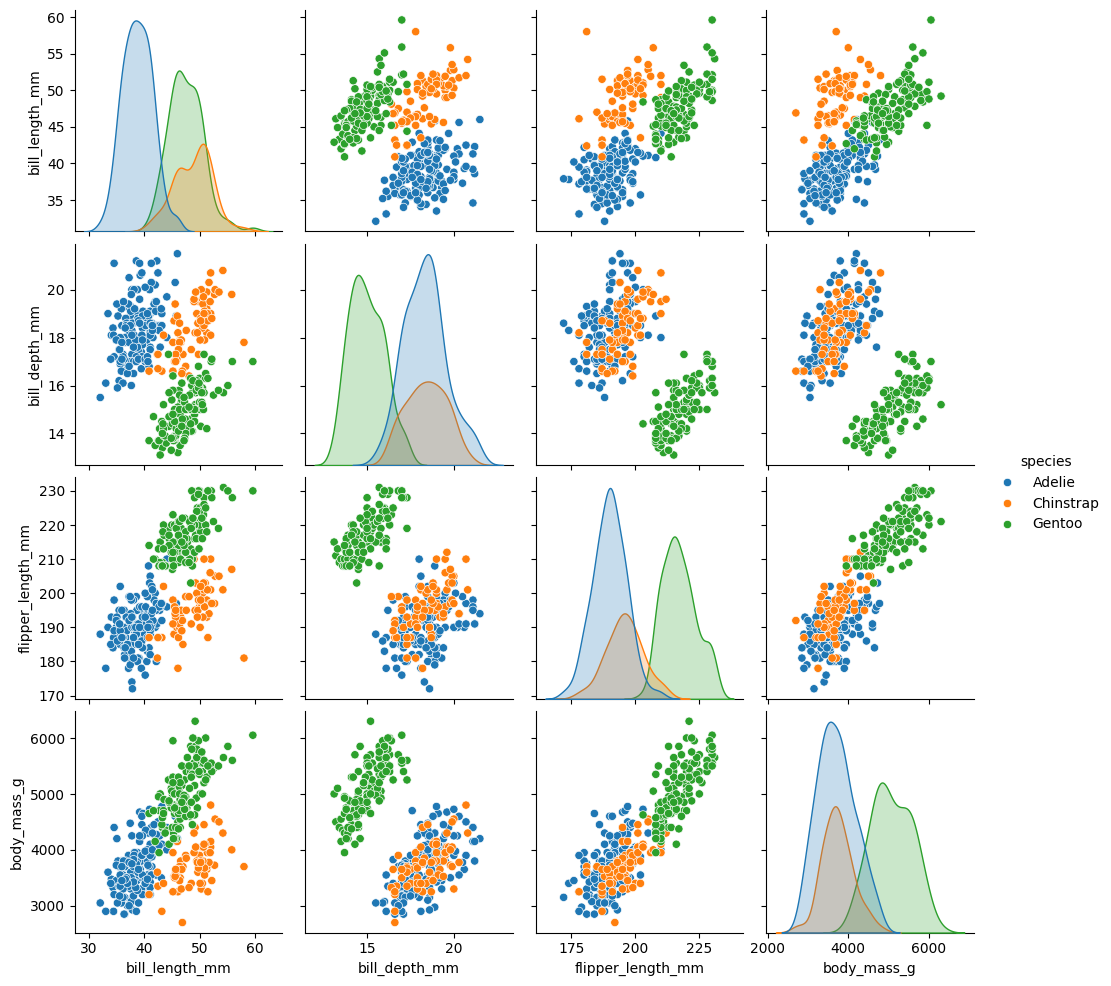

In [206]:
sns.pairplot(peng_six.drop(columns='grupo'), hue='species');

Acho que esse agrupamento não capturou um padrão natural muito claro. Quando analisei os grupos, percebi que os pinguins da mesma espécie e sexo aparecem espalhados em clusters diferentes, o que me faz pensar que o modelo acabou agrupando por diferenças menores que não têm tanto significado. Utilizando menos clusters como demonstrado nos primeiros capítulos, os grupos fariam mais sentido.